##Machine Translation Using a Seq2Seq Architecture
© 2023, Zaka AI, Inc. All Rights Reserved.

---
The goal of this colab is to get you more familiar with the Seq2Seq models and their challenges. For this reason, you will be working on machine translation problem where we would have a sentence as input (in english), and the output is gonna be the translated sentence (in french). So just like what happens with Google Translate.


**Just to give you a heads up:** We won't be having a model performing like Google translate, but at least we will have an idea about how Google Translate works and the challenges that exist with a translation problem.  

## Importing Libraries

We start by importing numpy and pandas and then we can add the rest

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, GRU, Input, TimeDistributed, Activation, RepeatVector, Bidirectional, Dropout, LSTM
from keras.losses import sparse_categorical_crossentropy
from sklearn.model_selection import train_test_split
import re

We clone the github repository where our data exists. Here is the github link: https://github.com/zaka-ai/machine_learning_certification/tree/main/Challenge%207

## Getting the data

In [ ]:
#Test Your Zaka
!git clone https://github.com/zaka-ai/machine_learning_certification

Cloning into 'machine_learning_certification'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 43 (delta 10), reused 10 (delta 1), pack-reused 0
Receiving objects: 100% (43/43), 43.23 MiB | 21.93 MiB/s, done.
Resolving deltas: 100% (10/10), done.


We read the english sentences in a dataframe named "english", and the french sentences in a dataframe named "french"

In [ ]:
#Test Your Zaka (English)
%cd '/content/machine_learning_certification/Challenge 7'
english = pd.read_csv('en.csv')
english.head()

/content/machine_learning_certification/Challenge 7


,"new jersey is sometimes quiet during autumn , and it is snowy in april ."
0,the united states is usually chilly during jul...
1,"california is usually quiet during march , and..."
2,the united states is sometimes mild during jun...
3,"your least liked fruit is the grape , but my l..."
4,"his favorite fruit is the orange , but my favo..."


In [ ]:
#Test Your Zaka (French)$
french = pd.read_csv('fr.csv')
french.head()

,"new jersey est parfois calme pendant l' automne , et il est neigeux en avril ."
0,les états-unis est généralement froid en juill...
1,"california est généralement calme en mars , et..."
2,"les états-unis est parfois légère en juin , et..."
3,"votre moins aimé fruit est le raisin , mais mo..."
4,"son fruit préféré est l'orange , mais mon préf..."


**How many sentences does each of the files contain?**

In [ ]:
#Test Your Zaka
print('There are {} english sentences , and {} french sentences'.format(len(english), len(french)))

There are 137859 english sentences , and 137859 french sentences


Now let us concatenate the 2 dataframes into one dataframe that we call **df** where one column has the english senetnces and the other has the french sentences

In [ ]:
#Test Your Zaka
df=pd.concat([english, french], axis=1)
df.reset_index(inplace=True)

In [ ]:
df.head()

,index,"new jersey is sometimes quiet during autumn , and it is snowy in april .","new jersey est parfois calme pendant l' automne , et il est neigeux en avril ."
0,0,the united states is usually chilly during jul...,les états-unis est généralement froid en juill...
1,1,"california is usually quiet during march , and...","california est généralement calme en mars , et..."
2,2,the united states is sometimes mild during jun...,"les états-unis est parfois légère en juin , et..."
3,3,"your least liked fruit is the grape , but my l...","votre moins aimé fruit est le raisin , mais mo..."
4,4,"his favorite fruit is the orange , but my favo...","son fruit préféré est l'orange , mais mon préf..."


Let's name the columns as **English** and **French** so that we access them easier.

In [ ]:
#Test Your Zaka
df.columns=['Index', 'English', 'French']
df.head()

,Index,English,French
0,0,the united states is usually chilly during jul...,les états-unis est généralement froid en juill...
1,1,"california is usually quiet during march , and...","california est généralement calme en mars , et..."
2,2,the united states is sometimes mild during jun...,"les états-unis est parfois légère en juin , et..."
3,3,"your least liked fruit is the grape , but my l...","votre moins aimé fruit est le raisin , mais mo..."
4,4,"his favorite fruit is the orange , but my favo...","son fruit préféré est l'orange , mais mon préf..."


Pick a sentence and print it in both languages

In [ ]:
#Test Your Zaka
english_sent=df.iloc[5]['English']
french_sent= df.iloc[5]['French']
print('english sentence: " {} ", \nFrench sentence: " {} " '.format(english_sent, french_sent))

english sentence: " paris is relaxing during december , but it is usually chilly in july . ", 
French sentence: " paris est relaxant en décembre , mais il est généralement froid en juillet . " 


##Cleaning Data

The data that we have is almost clean as we can see, we just need to remove the punctuations inside of it.

In [ ]:
#Removing punctuations using replace() method
import string
df = df.replace(f'[{string.punctuation}]', '', regex=True)

<ipython-input-83-1d34ba99c988>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df["English"] = df["English"].str.replace('[^\w\s]','')
<ipython-input-83-1d34ba99c988>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df["French"] = df["French"].str.replace('[^\w\s]','')


In [ ]:
df.head()

,Index,English,French
0,0,the united states is usually chilly during jul...,les étatsunis est généralement froid en juille...
1,1,california is usually quiet during march and ...,california est généralement calme en mars et ...
2,2,the united states is sometimes mild during jun...,les étatsunis est parfois légère en juin et i...
3,3,your least liked fruit is the grape but my le...,votre moins aimé fruit est le raisin mais mon...
4,4,his favorite fruit is the orange but my favor...,son fruit préféré est lorange mais mon préfér...


Make sure that the punctuation is removed by printing the example that you printed earlier.

In [ ]:
#Test Your Zaka
english_sent=df.iloc[5]['English']
french_sent= df.iloc[5]['French']
print('English sentence: " {} ", \nFrench sentence: " {} " '.format(english_sent, french_sent))

English sentence: " paris is relaxing during december  but it is usually chilly in july  ", 
French sentence: " paris est relaxant en décembre  mais il est généralement froid en juillet  " 


##Exploring the Data

Add a column **ENG Length** to the dataset that shows how many words does a sentence contain, and do the same for french in a column called **FR Length**

In [ ]:
#Test Your Zaka
# Using DataFrame.insert() to add a column
df.insert(3, "ENG Length",df['English'].apply(lambda x : len(x.split(" ")) ))
df.insert(4, "FR Length",df['French'].apply(lambda x : len(x.split(" ")) ))

In [ ]:
df.head()

,Index,English,French,ENG Length,FR Length
0,0,the united states is usually chilly during jul...,les étatsunis est généralement froid en juille...,17,15
1,1,california is usually quiet during march and ...,california est généralement calme en mars et ...,15,15
2,2,the united states is sometimes mild during jun...,les étatsunis est parfois légère en juin et i...,16,15
3,3,your least liked fruit is the grape but my le...,votre moins aimé fruit est le raisin mais mon...,16,16
4,4,his favorite fruit is the orange but my favor...,son fruit préféré est lorange mais mon préfér...,14,13


Visualize the distribution of the lengths of english sentences and french sentences.

<Axes: ylabel='Frequency'>

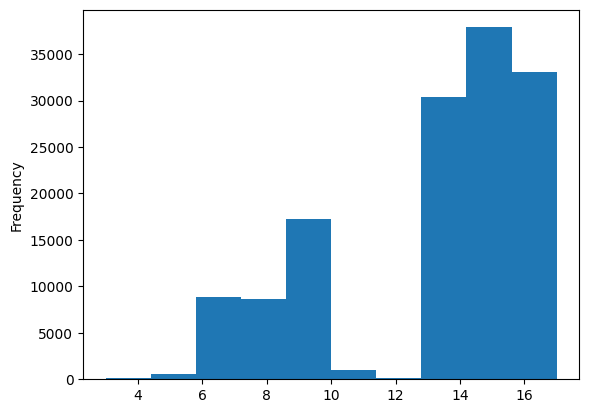

In [ ]:
#Test Your Zaka
df['ENG Length'].plot(kind='hist')

<Axes: ylabel='Frequency'>

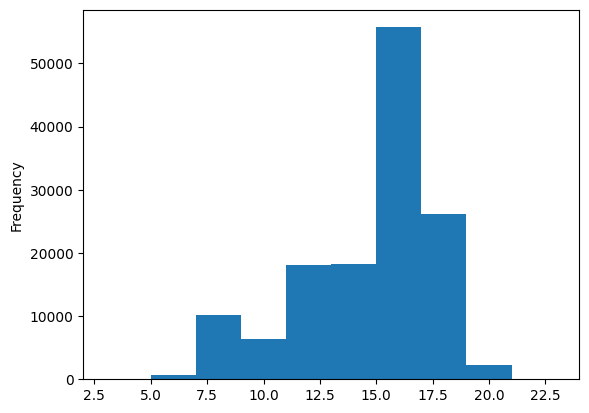

In [ ]:
#Test Your Zaka
df['FR Length'].plot(kind='hist')

Get the maximum length of an english sentence and the maximum length of a french sentence.

In [ ]:
print('The maximum length of an english sentence is: {}.\nThe maximum length of a french sentence is: {}.'.format(df['ENG Length'].max(),df['FR Length'].max()) )

The maximum length of an english sentence is: 17.
The maximum length of a french sentence is: 23.


##Preprocessing the Data

In order for the data to be fed to the model, it has to be tokenized and padded.

####Tokenization

**To tokenize english and french sentences, we can use only one tokenizer. True or False?**

**[False, We'll use the same Tokenizer from the library but create two instances, one for english and the other for french]**

Tokenize the sentences that we have.

In [ ]:
eng_tokenizer = Tokenizer(num_words=10000)
fr_tokenizer = Tokenizer(num_words=10000)

eng_tokenizer.fit_on_texts(df['English'])
fr_tokenizer.fit_on_texts(df['French'])

eng_tokens_seq = eng_tokenizer.texts_to_sequences(df['English'])
fr_tokens_seq = fr_tokenizer.texts_to_sequences(df['French'])

eng_word_index = eng_tokenizer.word_index
fr_word_index = fr_tokenizer.word_index

eng_vocab_size = len(eng_tokenizer.word_index) + 1
fr_vocab_size = len(fr_tokenizer.word_index) + 1

**How many unique words do we have in english and in french?**

In [ ]:
max_length = max(df['FR Length'])
print(f"Max sequence length {max_length}")

Max sequence length 23


In [ ]:
print(f"There are {len(eng_word_index)} unique English words")
print(f"There are {len(fr_word_index)} unique French words")

There are 199 unique English words
There are 344 unique French words


####Padding

**What should be the length of the sequences that we have after padding?**

**[It should be the length of the longest sentence which is 23 in the french sentences]**

Perform padding on the sequences that we have.

In [ ]:
ENG_pad = pad_sequences(eng_tokens_seq, maxlen=max_length, padding='post')
FR_pad = pad_sequences(fr_tokens_seq, maxlen=max_length, padding='post')

In [ ]:
print("Original sequence : {}\nOriginal sequence size : {}\nPadded sequence size : {}".format(df['English'][5], len(eng_tokens_seq[5]), len(ENG_pad[5])))

Original sequence : paris is relaxing during december  but it is usually chilly in july 
Original sequence size : 12
Padded sequence size : 23


In [ ]:
#Expanding dimensions
FR_pad = FR_pad.reshape(*FR_pad.shape, 1)
print(FR_pad.shape)

(137859, 23, 1)


##Modeling

After preprrocessing the data, we can build our model. Start by building a baseline architecture relying on one directional RNNs, LSTMs, or GRUs. It will be good to lookup how to build Seq2Seq models, there are some new layers that will help you like RepeatVector and TimeDistributed.

In [ ]:
embedding_dim = 300

model = Sequential()
model.add(Embedding(eng_vocab_size, embedding_dim, input_length=max_length, input_shape=ENG_pad.shape[1:]))
model.add(LSTM(256, return_sequences=True))
model.add(TimeDistributed(Dense(1024, activation='relu')))
model.add(TimeDistributed(Dense(fr_vocab_size, activation='softmax')))

model.compile(loss=sparse_categorical_crossentropy, optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 23, 300)           60000     
                                                                 
 lstm_12 (LSTM)              (None, 23, 256)           570368    
                                                                 
 time_distributed_14 (TimeD  (None, 23, 1024)          263168    
 istributed)                                                     
                                                                 
 time_distributed_15 (TimeD  (None, 23, 345)           353625    
 istributed)                                                     
                                                                 
Total params: 1247161 (4.76 MB)
Trainable params: 1247161 (4.76 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Compile and train the model.
**FYI:** While specifying the architecture of your model and the number of epochs for training, keeep in your mind that your model might take A LOT of time to train.

In [ ]:
history = model.fit(ENG_pad, FR_pad, batch_size=100, epochs=5, validation_split=0.2)

Epoch 1/5
1103/1103 [==============================] - 342s 309ms/step - loss: 0.8127 - accuracy: 0.7881 - val_loss: 0.3615 - val_accuracy: 0.8801
Epoch 2/5
1103/1103 [==============================] - 341s 309ms/step - loss: 0.3130 - accuracy: 0.8950 - val_loss: 0.2841 - val_accuracy: 0.9028
Epoch 3/5
1103/1103 [==============================] - 346s 314ms/step - loss: 0.2573 - accuracy: 0.9121 - val_loss: 0.2469 - val_accuracy: 0.9170
Epoch 4/5
1103/1103 [==============================] - 344s 312ms/step - loss: 0.2326 - accuracy: 0.9194 - val_loss: 0.2279 - val_accuracy: 0.9211
Epoch 5/5
1103/1103 [==============================] - 340s 308ms/step - loss: 0.2170 - accuracy: 0.9243 - val_loss: 0.2210 - val_accuracy: 0.9233


Define a function that gets an input sentence in english and gives the output sentence in the french language.

In [ ]:
def translate(text,eng_tokenizer,fr_tokenizer,max_length, model):
  text = re.sub(r'[^\w\s]', '', text)

  sentence = [eng_tokenizer.word_index[word] for word in text.split()]
  sentence = pad_sequences([sentence], maxlen=max_length, padding='post')

  result = model.predict(sentence[:1])[0]
  index_to_words = {id: word for word, id in fr_tokenizer.word_index.items()}
  index_to_words[0] = '<PAD>'
  result=' '.join([index_to_words[prediction] for prediction in np.argmax(result, 1)])

  result = result.split()

  output=[]
  for i in result:
    if i !='<PAD>':
      output.append(i)

  return (' '.join(output))

Test the following sentence

In [ ]:
input = "she is driving the truck"
result = translate(input, eng_tokenizer, fr_tokenizer, max_length, model)
print(result)

1/1 [==============================] - 0s 280ms/step
elle conduit cette vieille bleu


Try to improve your model by modifying the architecture to take into account bidirectionality which is very useful in Machine Translation. Create a new model called model2

In [ ]:
model2 = Sequential()
model2.add(Embedding(eng_vocab_size, embedding_dim, input_length=max_length, input_shape=ENG_pad.shape[1:]))
model2.add(Bidirectional(LSTM(128)))
model2.add(RepeatVector(max_length))
model2.add(Bidirectional(LSTM(128, return_sequences=True)))
model2.add(TimeDistributed(Dense(1024, activation='relu')))
model2.add(TimeDistributed(Dense(fr_vocab_size, activation='softmax')))

model2.compile(loss=sparse_categorical_crossentropy, optimizer='adam', metrics=['accuracy'])
model2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 23, 300)           60000     
                                                                 
 bidirectional_10 (Bidirect  (None, 256)               439296    
 ional)                                                          
                                                                 
 repeat_vector_5 (RepeatVec  (None, 23, 256)           0         
 tor)                                                            
                                                                 
 bidirectional_11 (Bidirect  (None, 23, 256)           394240    
 ional)                                                          
                                                                 
 time_distributed_16 (TimeD  (None, 23, 1024)          263168    
 istributed)                                          

compile and train your new model.

In [ ]:
history2 = model2.fit(ENG_pad, FR_pad, batch_size=100, epochs=5, validation_split=0.2)

Epoch 1/5
1103/1103 [==============================] - 443s 397ms/step - loss: 1.1336 - accuracy: 0.7051 - val_loss: 0.6605 - val_accuracy: 0.7997
Epoch 2/5
1103/1103 [==============================] - 436s 395ms/step - loss: 0.4585 - accuracy: 0.8604 - val_loss: 0.3078 - val_accuracy: 0.9053
Epoch 3/5
1103/1103 [==============================] - 439s 398ms/step - loss: 0.2360 - accuracy: 0.9278 - val_loss: 0.2084 - val_accuracy: 0.9355
Epoch 4/5
1103/1103 [==============================] - 437s 397ms/step - loss: 0.1609 - accuracy: 0.9496 - val_loss: 0.1394 - val_accuracy: 0.9568
Epoch 5/5
1103/1103 [==============================] - 438s 397ms/step - loss: 0.1270 - accuracy: 0.9598 - val_loss: 0.1265 - val_accuracy: 0.9611


Define a new function that relies on your new model to make predictions.

In [ ]:
def translate2(text,eng_tokenizer,fr_tokenizer,max_length, model):
  text = re.sub(r'[^\w\s]', '', text)

  sentence = [eng_tokenizer.word_index[word] for word in text.split()]
  sentence = pad_sequences([sentence], maxlen=max_length, padding='post')

  result = model.predict(sentence[:1])[0]
  index_to_words = {id: word for word, id in fr_tokenizer.word_index.items()}
  index_to_words[0] = '<PAD>'
  result=' '.join([index_to_words[prediction] for prediction in np.argmax(result, 1)])

  result = result.split()

  output=[]
  for i in result:
    if i !='<PAD>':
      output.append(i)

  return (' '.join(output))

In [ ]:
input = "she is driving the truck"

result2 = translate2(input, eng_tokenizer, fr_tokenizer, max_length, model2)
print(result2)

1/1 [==============================] - 18s 18s/step
elle conduit le camion blanc


**What is another adjustment in terms of architecture that you might be able to do to improve your model?**

**[I would incorporate an attention mechanism into the architecture. Attention mechanisms improve sequence understanding, handle long sequences, adapt to variable-length inputs, reduce overfitting, and provide interpretable results. This enhancement allows the model to focus on relevant information and can significantly boost its performance in various NLP tasks.]**

**What are some additional ways that we can do to improve the performance of our model?**

**[There's several ways to improve the performance of our model such as leveraging pre-trained word embeddings, such as BERT, can provide the model with a strong initial understanding of language, improving its performance on the task in hands.
In addition, I would perform error analysis which will help identify and rectify the specific types of mistakes the model is making, enabling targeted improvements in data collection and preprocessing.
Also, I could consider data augmentation techniques, like paraphrasing, which would diversify the training data, exposing the model to a wider range of text variations and thereby enhancing its ability to handle different inputs effectively.]**